<center><h2>
<a href="https://masumbhai.me">Kindly visit my portfolio to see more of my works</a>
</h2></center>

In [3]:
import warnings

import numpy as np
import pandas as pd
from dask import dataframe as dd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns

imgPath = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\ML_approach\\images\\"
filePath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Row_Data_Cleaning\\"
warnings.filterwarnings("ignore")

In [4]:
def readCSV_Function(file_path):
    dask_df = dd.read_csv(file_path, blocksize=1e6)
    dask_df = dask_df.repartition(npartitions=8)
    return dask_df.compute(scheduler='threads')

In [5]:
fileName = "cleaned_DrDoS_TFTP.csv"

initial_df = readCSV_Function(filePath+fileName)
initial_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
initial_df.drop(initial_df[initial_df.Label == "WebDDoS"].index, inplace=True,errors='ignore')
initial_df = shuffle(initial_df)
print(initial_df.shape)
initial_df['Label'].value_counts()

(949489, 78)


TFTP      947933
BENIGN      1556
Name: Label, dtype: int64

In [6]:
features_filepath = "D:\\Thesis_Group_of_Brig_Gen_Razzak_Sir\\After_Feature_Engineering\\Selected_Features_along_with_PCA.csv"
features_df = readCSV_Function(features_filepath)
features_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
feature_list = list(features_df["Names"])
feature_list.remove("Label")
feature_list.append("Label")

df = initial_df[feature_list]

weights = df['Label'].value_counts()/len(df)
y = df['Label']
X = df.drop(columns='Label')

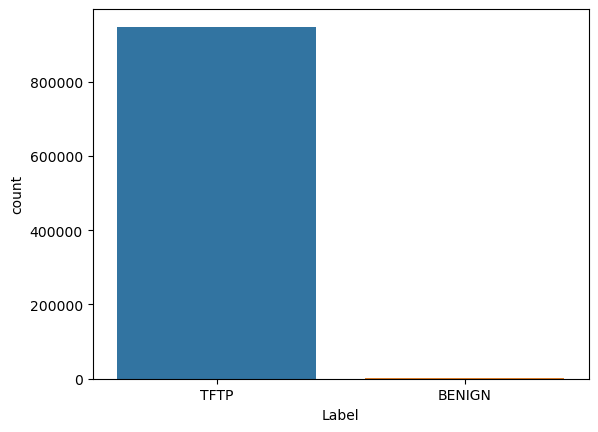

In [7]:
imgName = "initial_TFTP.png"
ax  = sns.countplot(x=y, label="Count")
plt.savefig(imgPath + imgName)

<center><h3 style="background:#FFEB3B;color:black">
Applying Repeated Edited Nearest Neighbors undersampling
</h3></center>

In [8]:
from collections import Counter
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

renn = RepeatedEditedNearestNeighbours(sampling_strategy='not minority', n_neighbors=10, max_iter=25, n_jobs=-1)
X_resampled_renn, y_resampled_renn = renn.fit_resample(X, y)

In [ ]:
counter = Counter(y_resampled_renn)
counter.most_common() # sorting ascending order for better plotting in graph
for i,j in counter.items():
    per = j/len(y_resampled_renn) * 100
    print(f"Label:{i}  n:{j}  {per:.3}%")

In [ ]:
imgName = "TFTP_Undersampled_by_RENN.png"
colors = ["#33FF33","#03A9F4"]

# plt.figure(figsize=(36,10))
plt.bar(x=sorted(counter, key=counter.get),height=sorted(counter.values()),color=colors,alpha=0.7,align="center",linewidth=0.5)
plt.rcParams['font.size'] = 24
plt.title("After Under-sampling TFTP with RENN")
plt.tight_layout()
plt.savefig(imgPath+imgName)

In [ ]:
dl_file_path = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\ML_approach\For_2_Step\\individual_csv_files\\"
dl_file_name = "TFTP_Dataset_RENN.csv"

data_res = np.concatenate((X_resampled_renn, np.vstack(y_resampled_renn)), axis = 1)
data_res = pd.DataFrame(data_res,columns=df.columns)
data_res = shuffle(data_res)
data_res.to_csv(dl_file_path+dl_file_name,index=False,header=True)

<center><h3 style="background:#FFEB3B;color:black">
Applying Random undersampling
</h3></center>

In [ ]:
import numpy as np
from collections import Counter

def random_undersample(X, y, ratio=1.0):
    counter = Counter(y)
    min_class_size = min(counter.values()) * ratio

    X_undersampled = []
    y_undersampled = []

    for class_label, class_size in counter.items():
        X_class = X[y == class_label]
        y_class = y[y == class_label]
        if class_size >= min_class_size:
            indices = np.random.choice(class_size, size=int(min_class_size), replace=False)
            X_undersampled.append(X_class[indices])
            y_undersampled.append(y_class[indices])
        else:
            X_undersampled.append(X_class)
            y_undersampled.append(y_class)
    # Concatenate the undersampled X and y arrays and return them
    X_undersampled = np.concatenate(X_undersampled)
    y_undersampled = np.concatenate(y_undersampled)
    return X_undersampled, y_undersampled

In [ ]:
X_resampled_rand,y_resampled_rand = random_undersample(X,y)

dl_file_path = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\ML_approach\For_2_Step\\individual_csv_files\\"
dl_file_name = "TFTP_Dataset_Cluster_Centroids.csv"

data_res = np.concatenate((X_resampled_rand, np.vstack(y_resampled_rand)), axis = 1)
data_res = pd.DataFrame(data_res,columns=df.columns)
data_res = shuffle(data_res)
data_res.to_csv(dl_file_path+dl_file_name,index=False,header=True)

<center><h3 style="background:#FFEB3B;color:black">
Applying Cluster Centroids undersampling
</h3></center>

In [ ]:
from collections import Counter
from imblearn.under_sampling import ClusterCentroids

cc_US = ClusterCentroids(sampling_strategy='not minority')
X_resampled_cc, y_resampled_cc = cc_US.fit_resample(X, y)

In [ ]:
counter = Counter(y_resampled_cc)
counter.most_common() # sorting ascending order for better plotting in graph
for i,j in counter.items():
    per = j/len(y_resampled_cc) * 100
    print(f"Label:{i}  n:{j}  {per:.3}%")

In [ ]:
dl_file_path = "G:\\Brig_Gen_Razzak_Sir_Thesis_Group\\ML_approach\For_2_Step\\individual_csv_files\\"
dl_file_name = "TFTP_Dataset_Cluster_Centroids.csv"

data_res = np.concatenate((X_resampled_cc, np.vstack(y_resampled_cc)), axis = 1)
data_res = pd.DataFrame(data_res,columns=df.columns)
data_res = shuffle(data_res)
data_res.to_csv(dl_file_path+dl_file_name,index=False,header=True)

In [ ]:
imgName = "TFTP_Undersampled_by_Cluster_Centroids.png"
colors = ["#33FF33","#03A9F4"]

# plt.figure(figsize=(36,10))
plt.bar(x=sorted(counter, key=counter.get),height=sorted(counter.values()),color=colors,alpha=0.7,align="center",linewidth=0.5)
plt.rcParams['font.size'] = 24
plt.title("After Under-sampling TFTP with Cluster Centroids")
plt.tight_layout()
plt.savefig(imgPath+imgName)